In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "./combined_mortality_and_weather_2021_2022.csv"

In [3]:
df = pd.read_csv(file)
df

,disease,num_deaths,deaths_per_100000,country,date,rainfall,temperature,year,month
0,dementia and alzheimer disease,5655,119.4,England,2021-01,132.0,1.9,2021,1
1,ischaemic heart diseases,4833,103.0,England,2021-01,132.0,1.9,2021,1
2,cerebrovascular diseases,2516,53.4,England,2021-01,132.0,1.9,2021,1
3,malignant neoplasm of trachea bronchus and lung,2274,48.6,England,2021-01,132.0,1.9,2021,1
4,chronic lower respiratory diseases,2025,43.1,England,2021-01,132.0,1.9,2021,1
...,...,...,...,...,...,...,...,...,...
409,influenza and pneumonia,206,70.3,Wales,2022-12,80.4,2.9,2022,12
410,cerebrovascular diseases,174,58.0,Wales,2022-12,80.4,2.9,2022,12
411,malignant neoplasm of trachea bronchus and lung,140,45.8,Wales,2022-12,80.4,2.9,2022,12
412,symptoms signs and ill-defined conditions,127,45.1,Wales,2022-12,80.4,2.9,2022,12


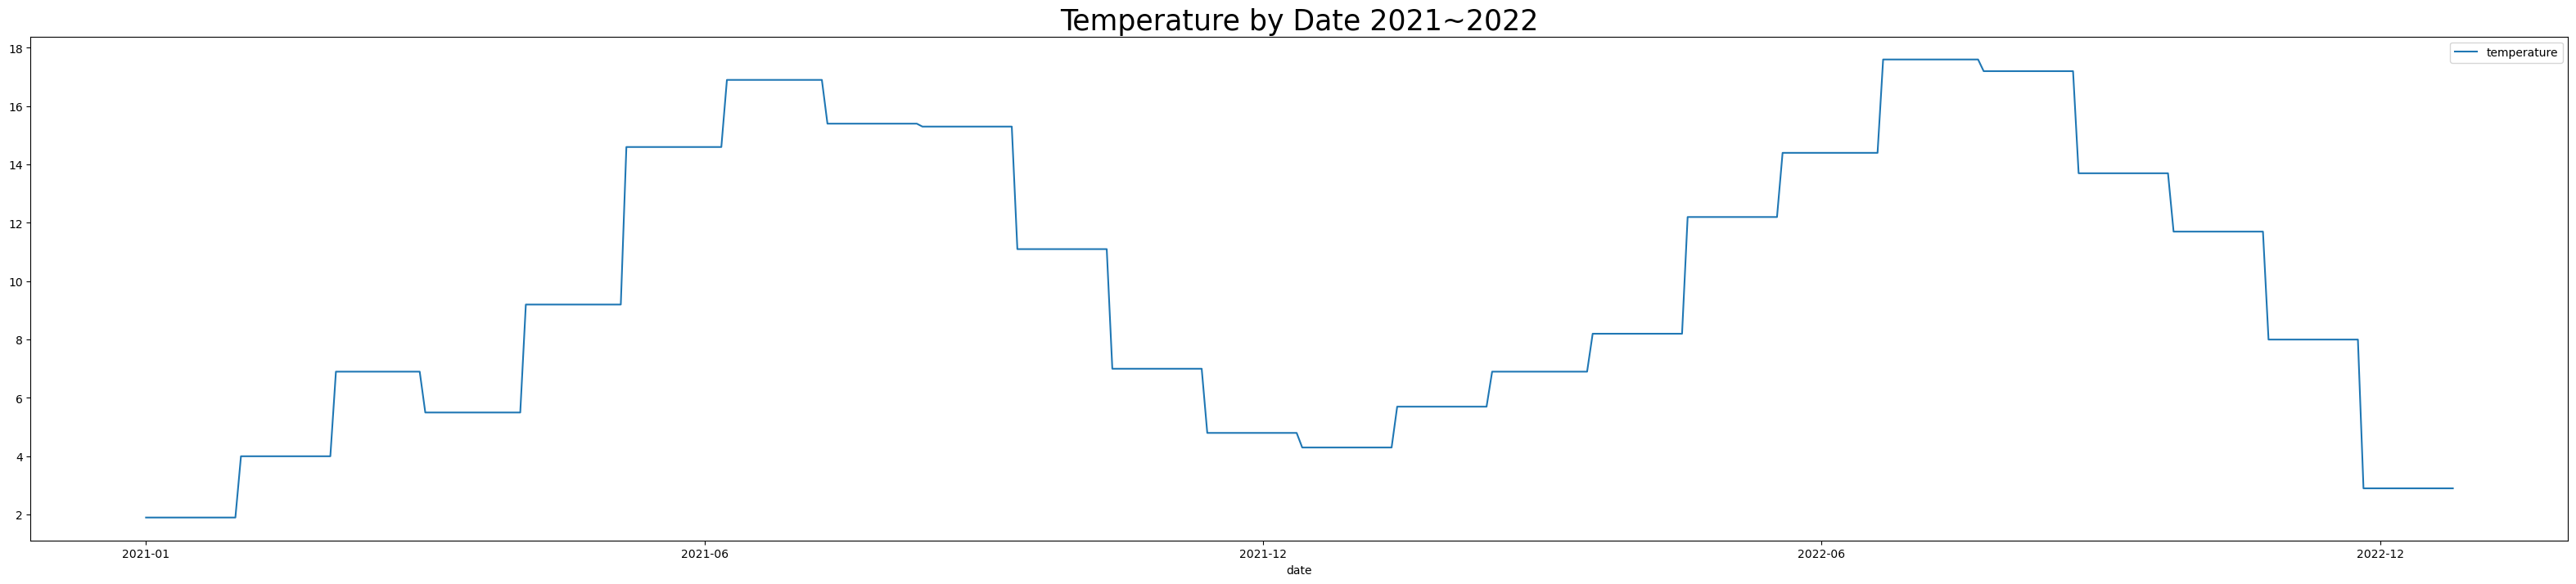

In [104]:
df.plot(x = 'date', y = 'temperature', figsize = (40, 8))
plt.title("Temperature by Date 2021~2022", fontsize = 25)
plt.show()

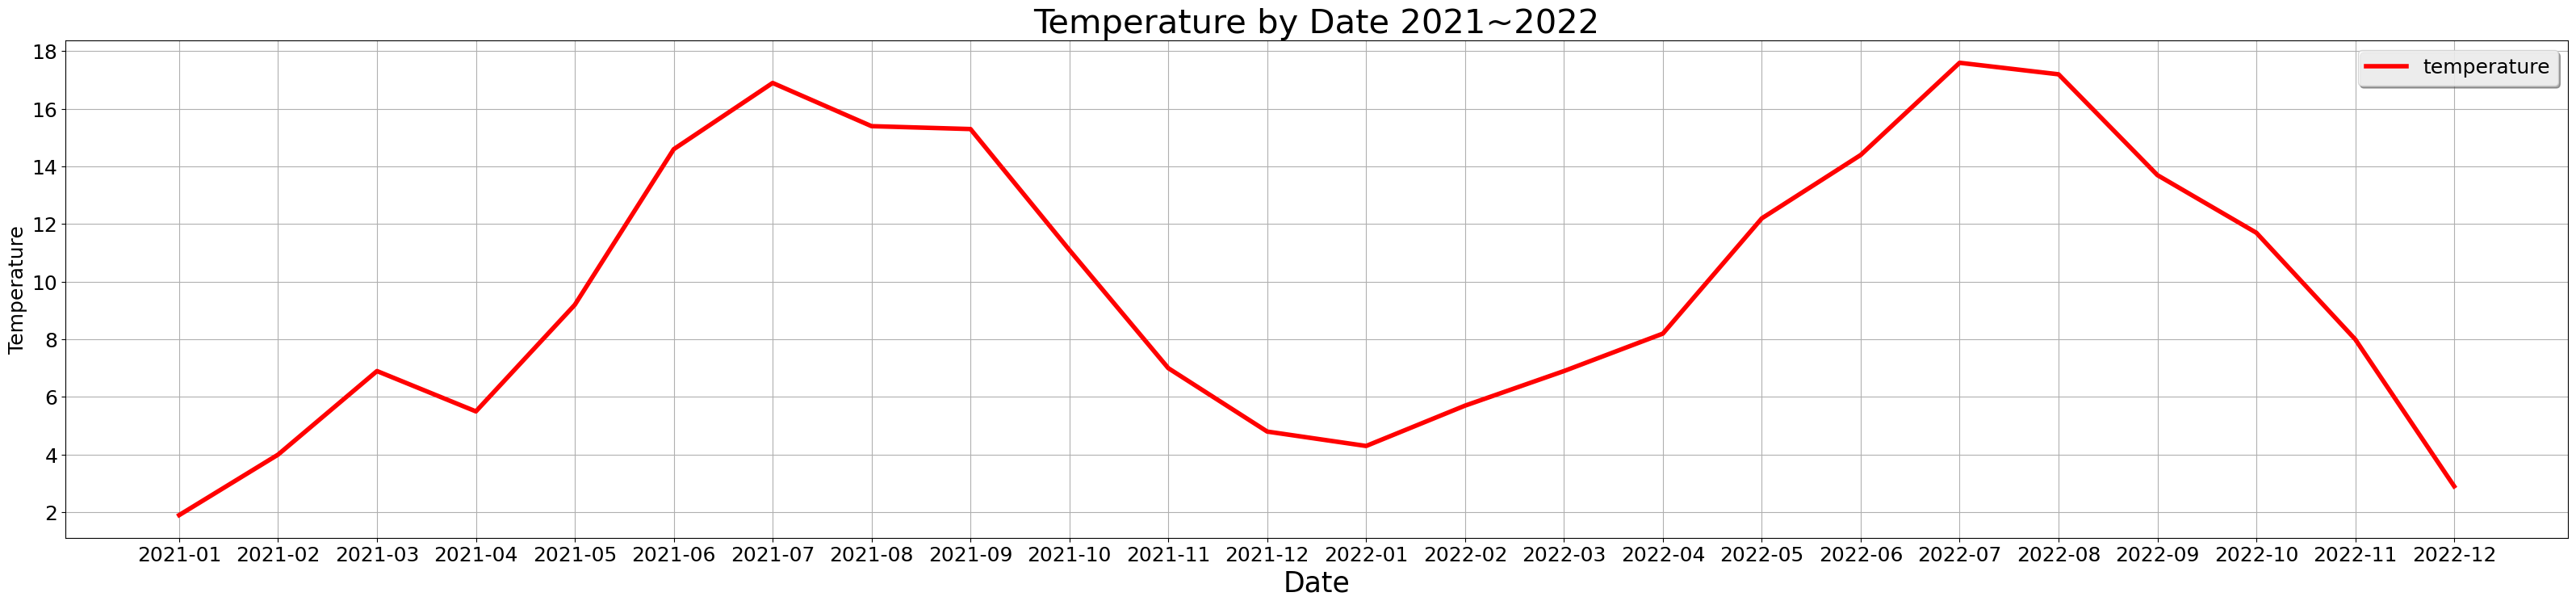

In [36]:
plt.figure(figsize=(40, 8))
plt.plot(df['date'], df['temperature'], linewidth=4, label='temperature', color='red')  # 선 굵기 설정
plt.title("Temperature by Date 2021~2022", fontsize=30)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Temperature', fontsize=18)
plt.legend(fontsize=18, loc='upper right', frameon=True, framealpha=0.8, shadow=True)  # 레전드 폰트 크기, 위치, 배경
plt.xticks(fontsize=18)  # x축 눈금 폰트 크기
plt.yticks(fontsize=18)  # y축 눈금 폰트 크기
plt.grid(True)
plt.show()

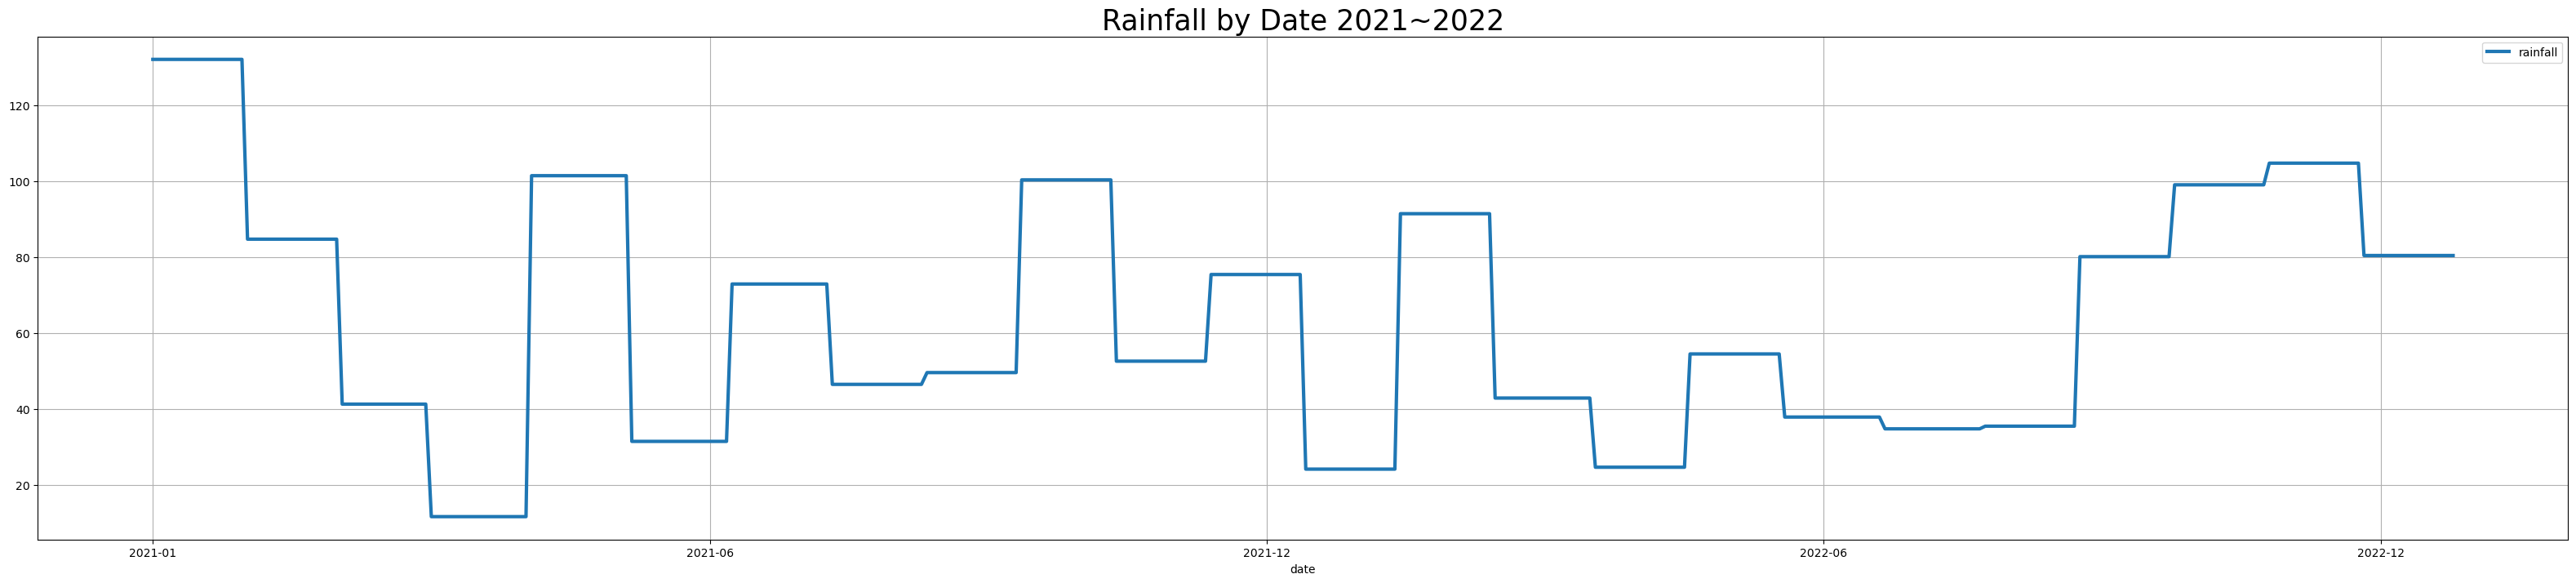

In [38]:
df.plot(x = 'date', y = 'rainfall', linewidth=3, figsize = (40,8), grid = True) # 영국 데이터 -> 01월에 강수량이 많고 
plt.title("Rainfall by Date 2021~2022", fontsize = 25)
plt.show()

In [7]:
people = df.groupby('country')['deaths_per_100000'].sum().astype(int).reset_index()

In [8]:
year_trend = df.groupby('year')['deaths_per_100000'].sum().astype(int).reset_index()

In [9]:
people

,country,deaths_per_100000
0,England,10610
1,Wales,11369


In [10]:
year_trend

,year,deaths_per_100000
0,2021,10768
1,2022,11211


Text(0.5, 1.0, 'Death Rates by Country')

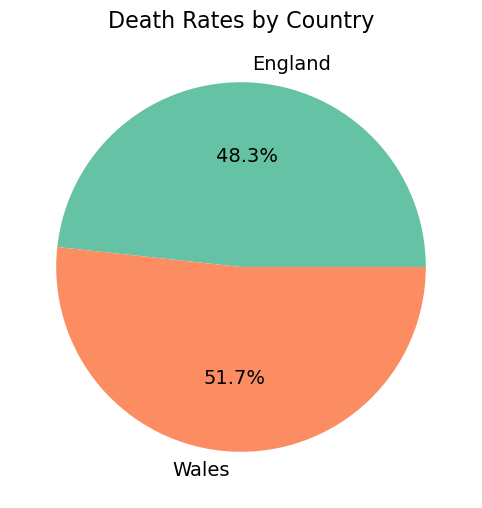

In [76]:
# 국가별 사망자 수 및 인구수 확인 
# 파이 차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(people['deaths_per_100000'], labels=people['country'], autopct='%1.1f%%', colors=sns.color_palette('Set2'), textprops={'fontsize': 14})

# 그래프 설정
plt.title('Death Rates by Country', fontsize=16)

/tmp/ipykernel_85417/486864547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='year', y='temperature',palette='pastel')


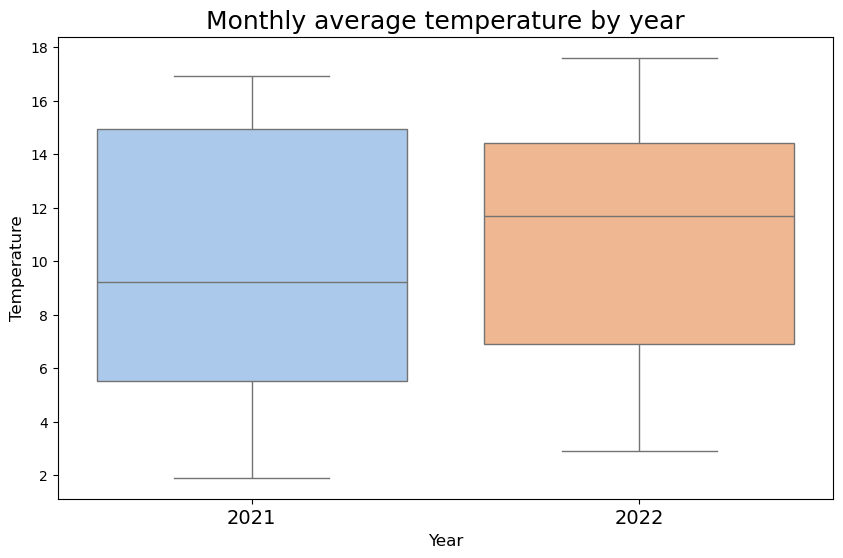

In [152]:
# 년도별 월평균 온도 분포 -> 중위값 보면 2022년도의 월평균 온도가 더 높았다 -> 사망률을 보면 더 높음 

plt.figure(figsize=(10, 6))
# 사용자 정의 색상
#custom_palette = {'2021': 'skyblue', '2022': 'salmon'}
ax = sns.boxplot(data=df, x='year', y='temperature',palette='pastel')  
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.title('Monthly average temperature by year',fontsize=18)
# x축 레이블의 폰트 크기 조정
ax.tick_params(axis='x', labelsize=14)  # y축 레이블의 폰트 크기 조정
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Death Rates per 100,000 by Year')

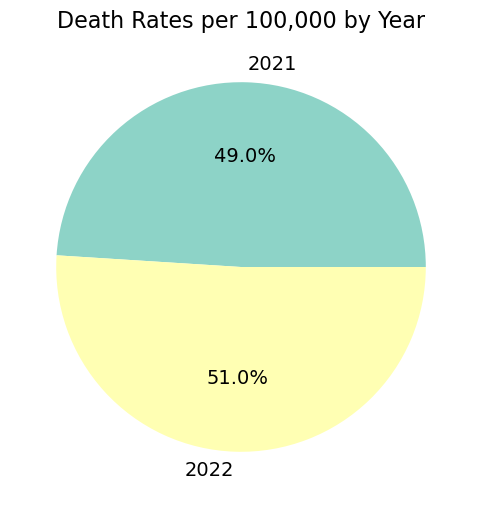

In [23]:
# 년도별 사망률 파이 차트 
# 파이 차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(year_trend['deaths_per_100000'], labels=year_trend['year'],autopct='%1.1f%%', colors=sns.color_palette('Set3'), textprops={'fontsize': 14})
# 그래프 설정
plt.title('Death Rates by Year', fontsize=16)

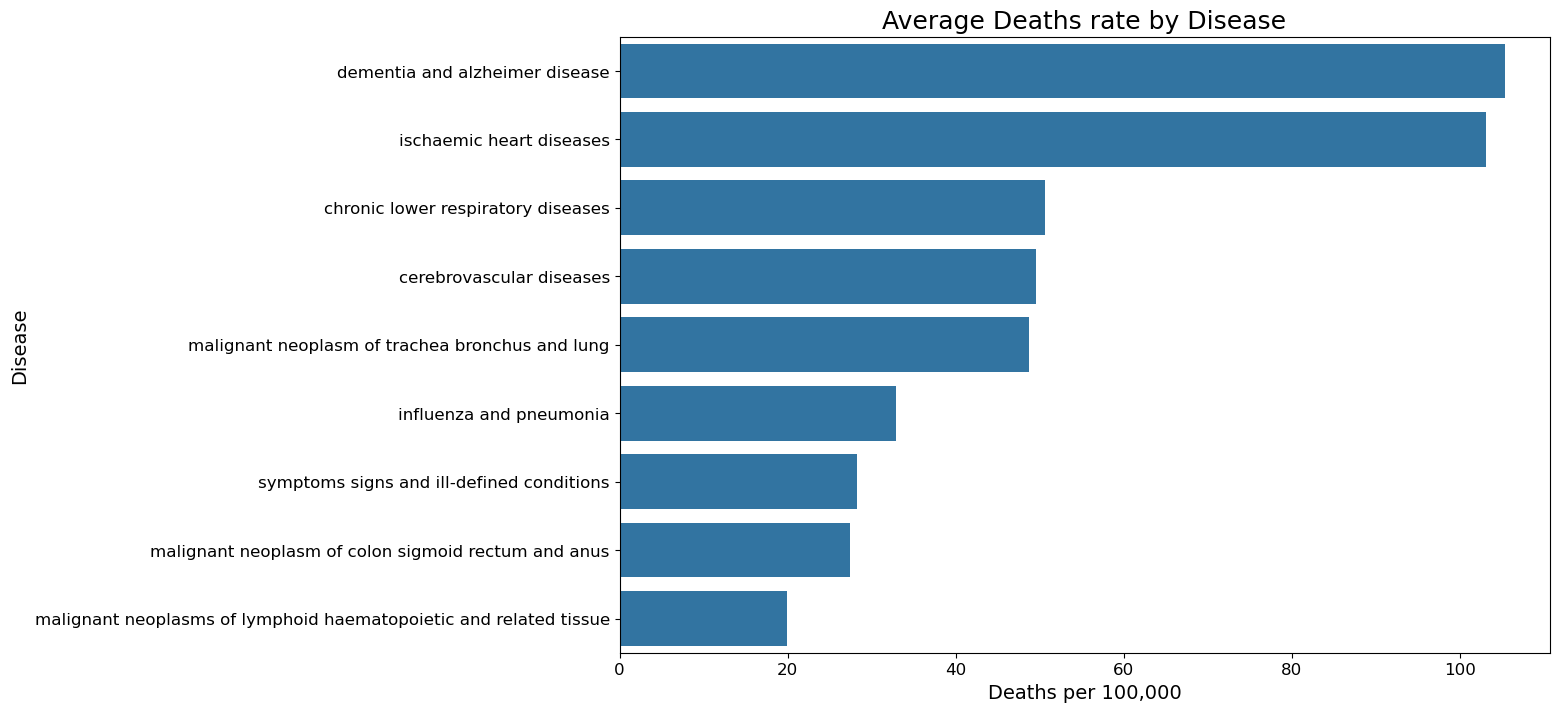

In [103]:
# 모든 질병에 대한 평균 사망률 집계
df_disease = df.groupby('disease')['deaths_per_100000'].mean().reset_index()
# 사망률 높은 순서로 정렬
df_disease = df_disease.sort_values(by='deaths_per_100000', ascending=False)

# 막대 그래프
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_disease, y='disease', x='deaths_per_100000')
plt.xlabel('Deaths per 100,000',fontsize=14)
plt.ylabel('Disease',fontsize=14) 
plt.title('Average Deaths rate by Disease', fontsize=18)
# y축 레이블의 폰트 크기 조정
ax.tick_params(axis='y', labelsize=12)  # y축 레이블의 폰트 크기 조정
# x축 레이블의 폰트 크기 조정
ax.tick_params(axis='x', labelsize=12)  # y축 레이블의 폰트 크기 조정

plt.show()

In [105]:
df['disease'].unique()# 9개 (중복제외 후 컬럼)

array(['dementia and alzheimer disease', 'ischaemic heart diseases',
       'cerebrovascular diseases',
       'malignant neoplasm of trachea bronchus and lung',
       'chronic lower respiratory diseases',
       'symptoms signs and ill-defined conditions',
       'influenza and pneumonia',
       'malignant neoplasm of colon sigmoid rectum and anus',
       'malignant neoplasms of lymphoid haematopoietic and related tissue'],
      dtype=object)

In [111]:
df

,disease,num_deaths,deaths_per_100000,country,date,rainfall,temperature,year,month
0,dementia and alzheimer disease,5655,119.4,England,2021-01,132.0,1.9,2021,1
1,ischaemic heart diseases,4833,103.0,England,2021-01,132.0,1.9,2021,1
2,cerebrovascular diseases,2516,53.4,England,2021-01,132.0,1.9,2021,1
3,malignant neoplasm of trachea bronchus and lung,2274,48.6,England,2021-01,132.0,1.9,2021,1
4,chronic lower respiratory diseases,2025,43.1,England,2021-01,132.0,1.9,2021,1
...,...,...,...,...,...,...,...,...,...
409,influenza and pneumonia,206,70.3,Wales,2022-12,80.4,2.9,2022,12
410,cerebrovascular diseases,174,58.0,Wales,2022-12,80.4,2.9,2022,12
411,malignant neoplasm of trachea bronchus and lung,140,45.8,Wales,2022-12,80.4,2.9,2022,12
412,symptoms signs and ill-defined conditions,127,45.1,Wales,2022-12,80.4,2.9,2022,12


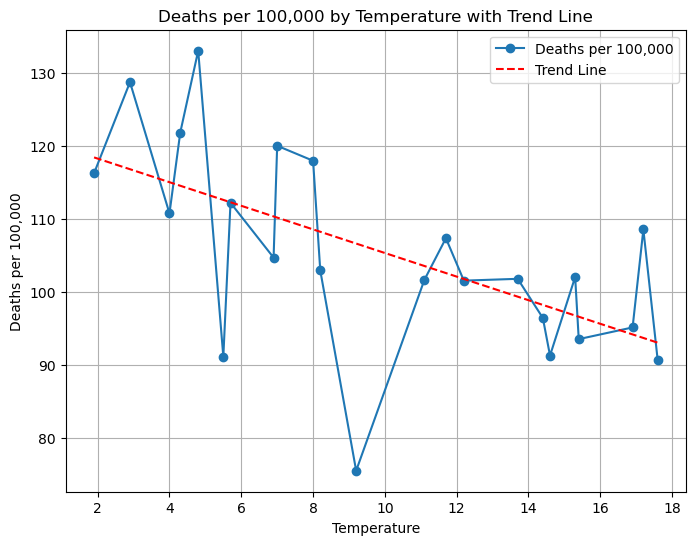

In [59]:
# 치매와 온도 관계 시각화 및 추세선 
ihd = df[df['disease'] == 'dementia and alzheimer disease']
ihd_gd = ihd.groupby('temperature')['deaths_per_100000'].mean().astype(float)

# 추세선 계산
x = ihd_gd.index
y = ihd_gd.values
coefficients = np.polyfit(x, y, 1)
trendline = np.polyval(coefficients, x)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(ihd_gd.index, ihd_gd.values, marker='o', label='Deaths per 100,000')
plt.plot(ihd_gd.index, trendline, label='Trend Line', linestyle='--', color='red')
plt.xlabel('Temperature')
plt.ylabel('Deaths per 100,000')
plt.title('Deaths per 100,000 by Temperature with Trend Line')
plt.grid(True)
plt.legend()
plt.show()

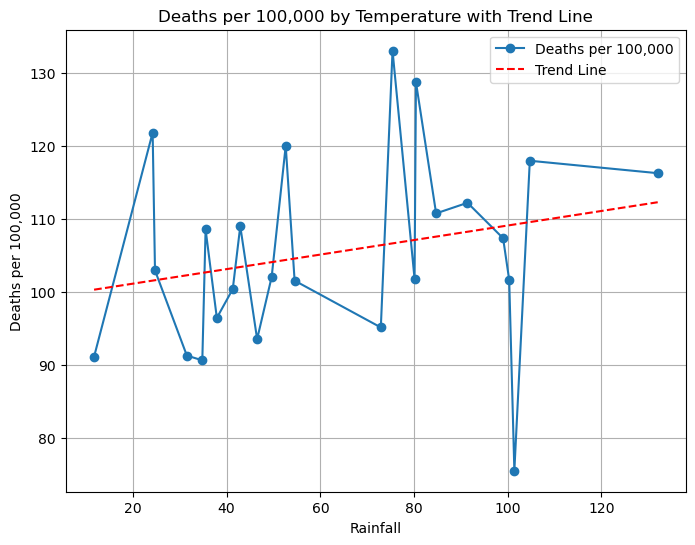

In [60]:
# 치매와 평균강수량 관계 시각화 및 추세선 
ihd = df[df['disease'] == 'dementia and alzheimer disease']
ihd_gd = ihd.groupby('rainfall')['deaths_per_100000'].mean().astype(float)

# 추세선 계산
x = ihd_gd.index
y = ihd_gd.values
coefficients = np.polyfit(x, y, 1)
trendline = np.polyval(coefficients, x)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(ihd_gd.index, ihd_gd.values, marker='o', label='Deaths per 100,000')
plt.plot(ihd_gd.index, trendline, label='Trend Line', linestyle='--', color='red')
plt.xlabel('Rainfall')
plt.ylabel('Deaths per 100,000')
plt.title('Deaths per 100,000 by Rainfall with Trend Line')
plt.grid(True)
plt.legend()
plt.show()

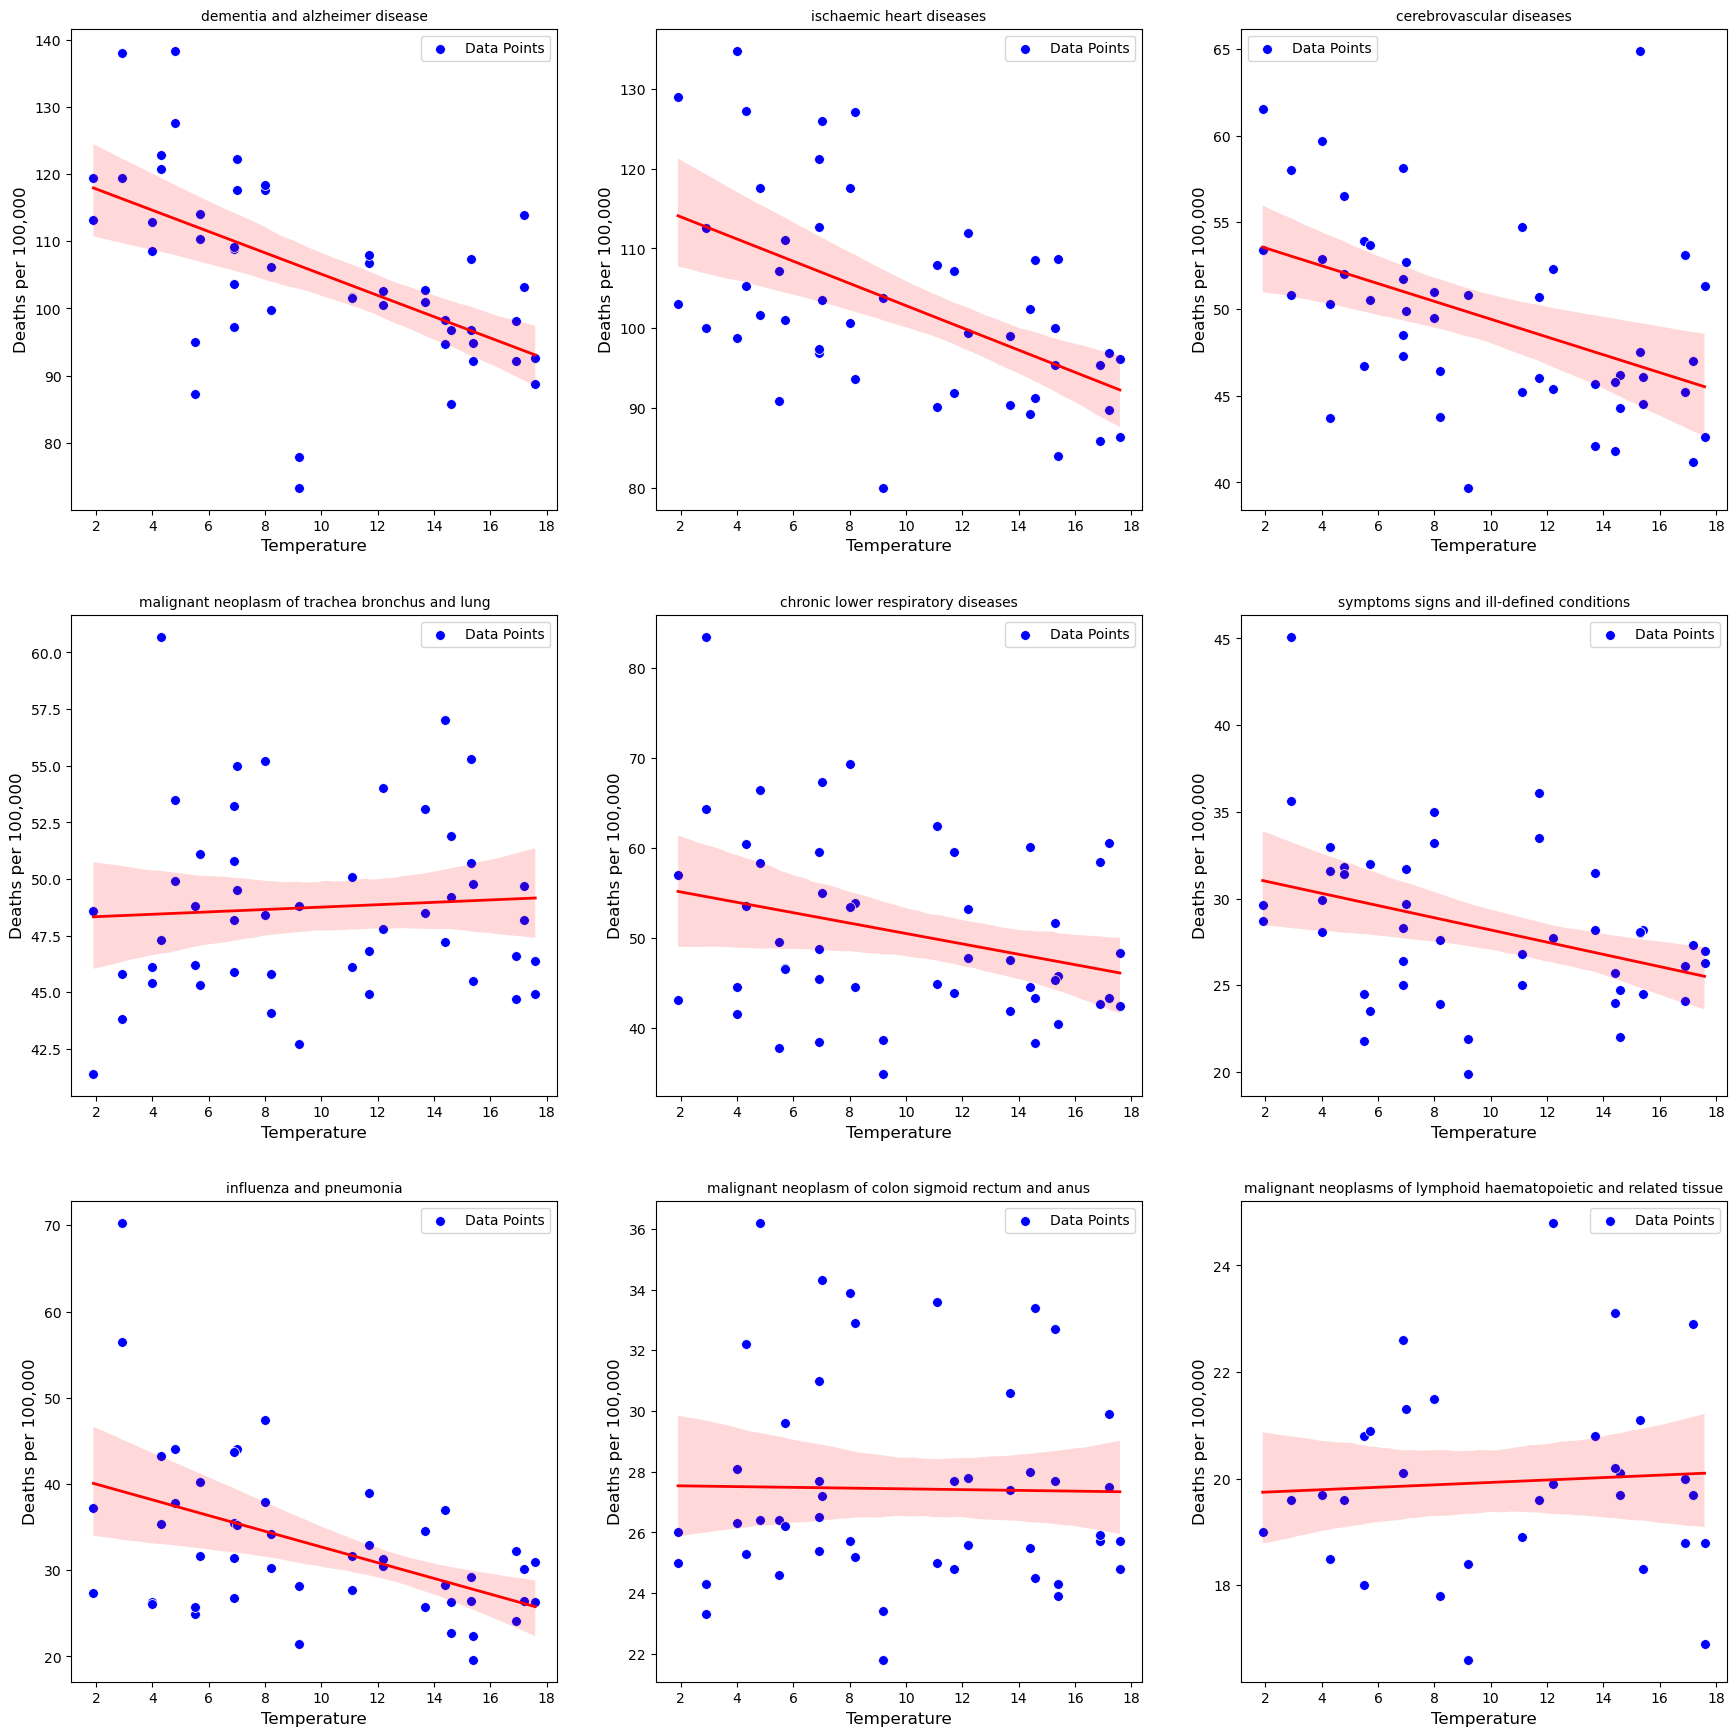

In [79]:
# 온도와 사망률 간의 관계를 산점도로 시각화하고, 회귀선을 추가하여 시각적으로 분석하는 코드
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

diseases = ['dementia and alzheimer disease',
            'ischaemic heart diseases',
            'cerebrovascular diseases',
            'malignant neoplasm of trachea bronchus and lung', 
            'chronic lower respiratory diseases', 'symptoms signs and ill-defined conditions', 
            'influenza and pneumonia',
            'malignant neoplasm of colon sigmoid rectum and anus','malignant neoplasms of lymphoid haematopoietic and related tissue']

for i, disease in enumerate(diseases):
    ax = axes[i]
    df_disease = df[df['disease'] == disease]
    sns.scatterplot(data=df_disease, x='temperature', y='deaths_per_100000', s=50, color='blue', label="Data Points", ax=ax)
    sns.regplot(data=df_disease, x='temperature', y='deaths_per_100000', scatter=False, color='red', line_kws={'linewidth': 2}, ax=ax)
    
    ax.set_xlabel('Temperature', fontsize=12)
    ax.set_ylabel('Deaths per 100,000', fontsize=12)
    ax.set_title(f'{disease}', fontsize=10)
    ax.legend()

plt.tight_layout(pad=3.0)
plt.show()

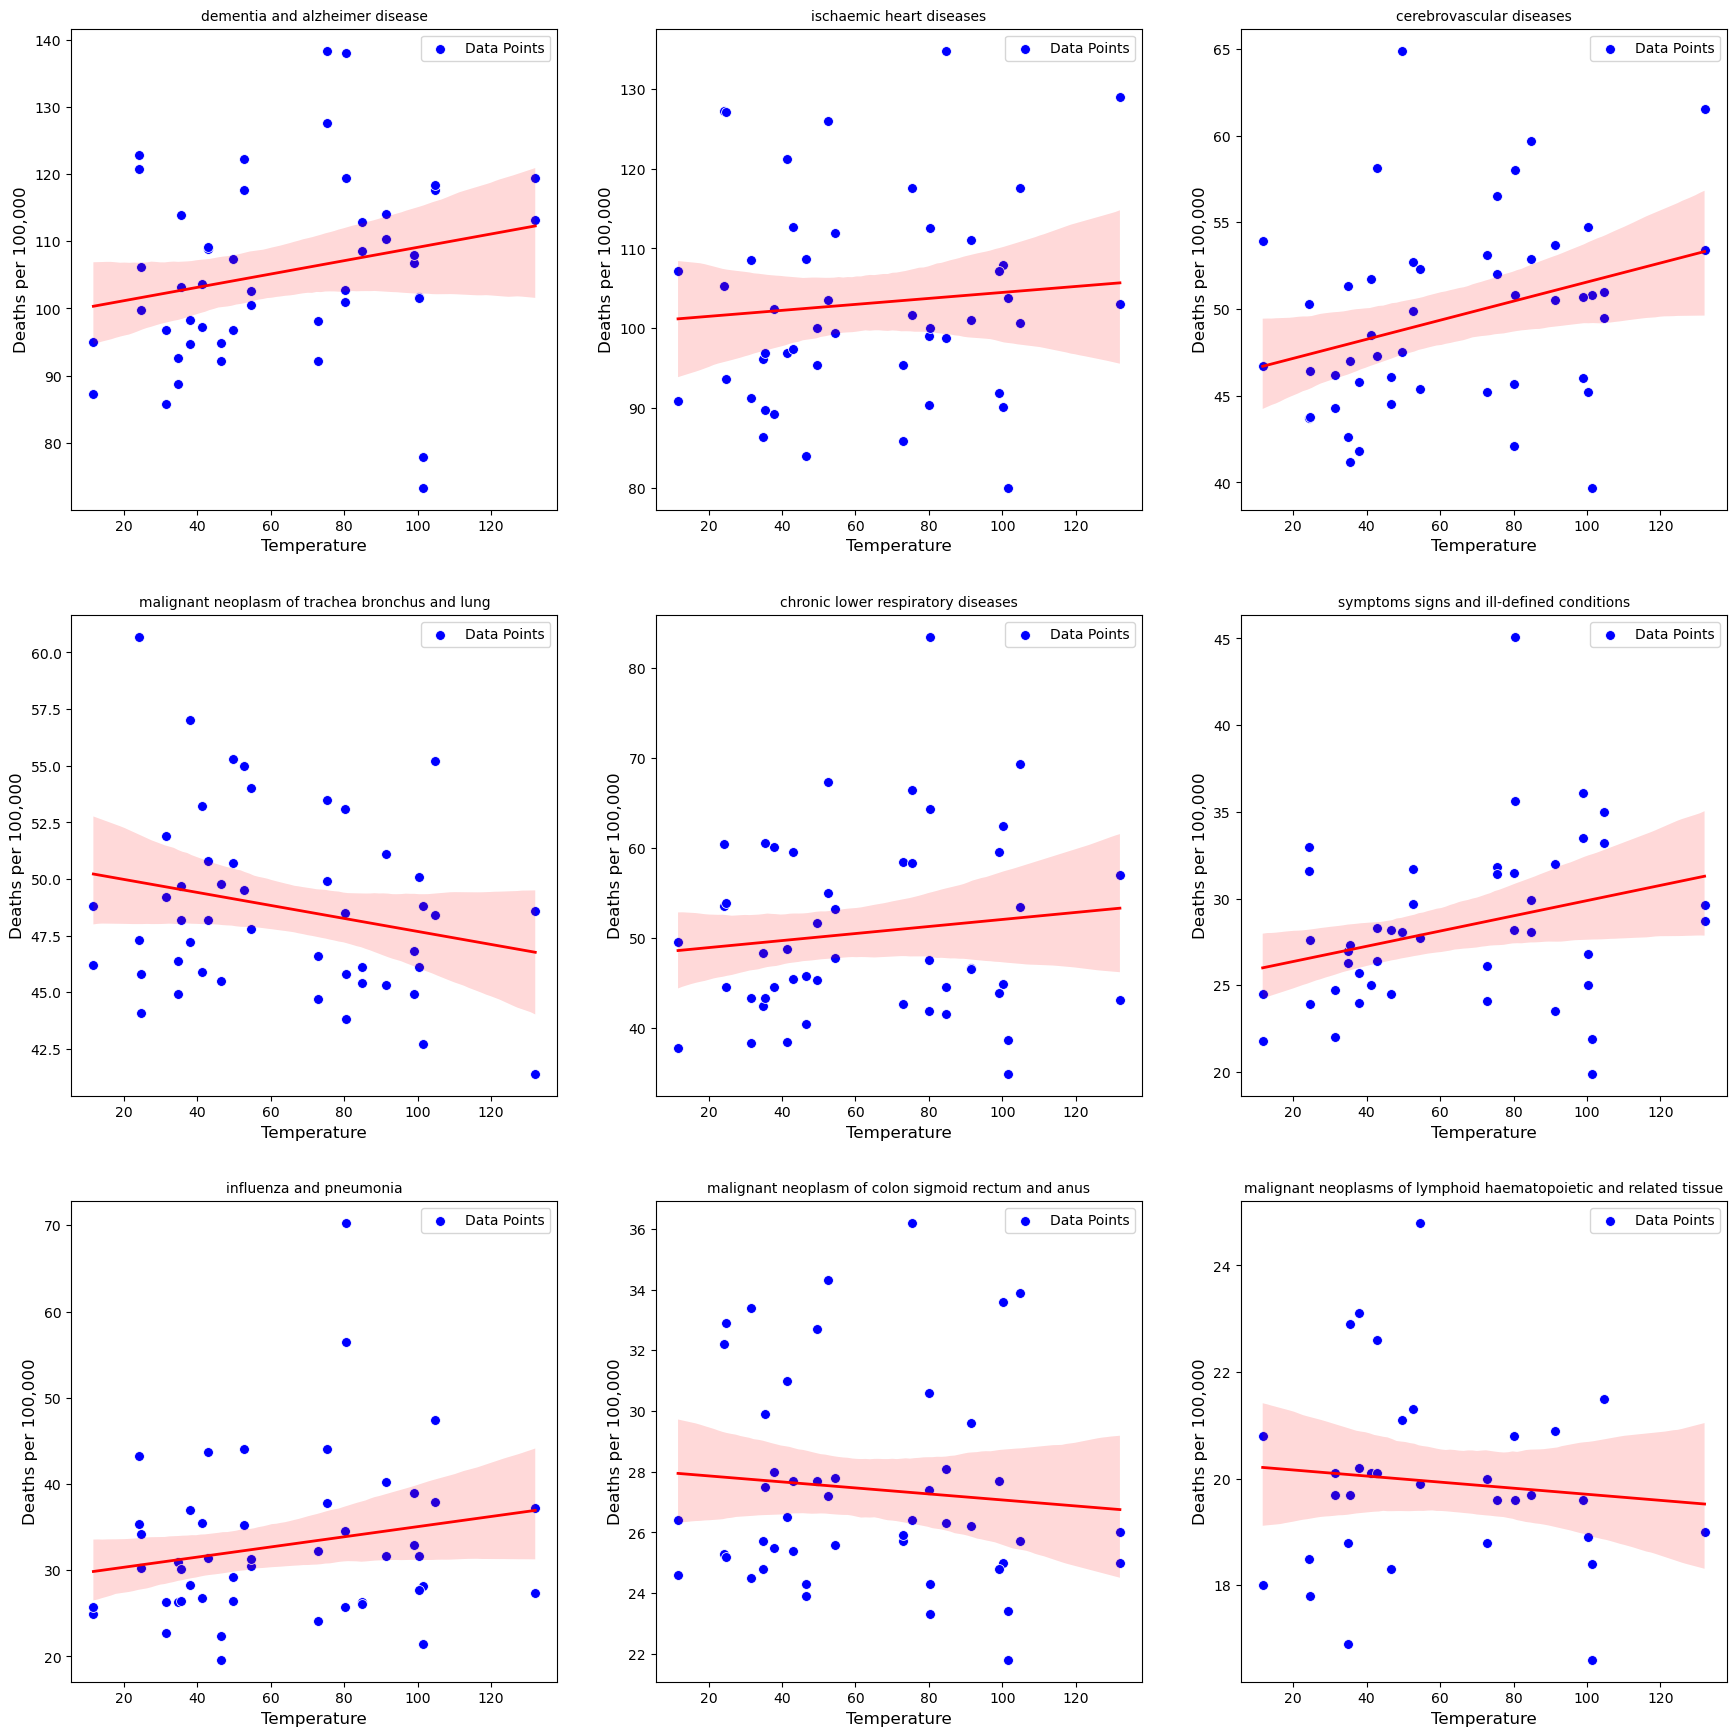

In [80]:
# 강수량과 사망률 간의 관계를 산점도로 시각화하고, 회귀선을 추가하여 시각적으로 분석하는 코드
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

diseases = ['dementia and alzheimer disease',
            'ischaemic heart diseases',
            'cerebrovascular diseases',
            'malignant neoplasm of trachea bronchus and lung', 
            'chronic lower respiratory diseases', 'symptoms signs and ill-defined conditions', 
            'influenza and pneumonia',
            'malignant neoplasm of colon sigmoid rectum and anus','malignant neoplasms of lymphoid haematopoietic and related tissue']

for i, disease in enumerate(diseases):
    ax = axes[i]
    df_disease = df[df['disease'] == disease]
    sns.scatterplot(data=df_disease, x='rainfall', y='deaths_per_100000', s=50, color='blue', label="Data Points", ax=ax)
    sns.regplot(data=df_disease, x='rainfall', y='deaths_per_100000', scatter=False, color='red', line_kws={'linewidth': 2}, ax=ax)
    
    ax.set_xlabel('Temperature', fontsize=12)
    ax.set_ylabel('Deaths per 100,000', fontsize=12)
    ax.set_title(f'{disease}', fontsize=10)
    ax.legend()

plt.tight_layout(pad=3.0)
plt.show()

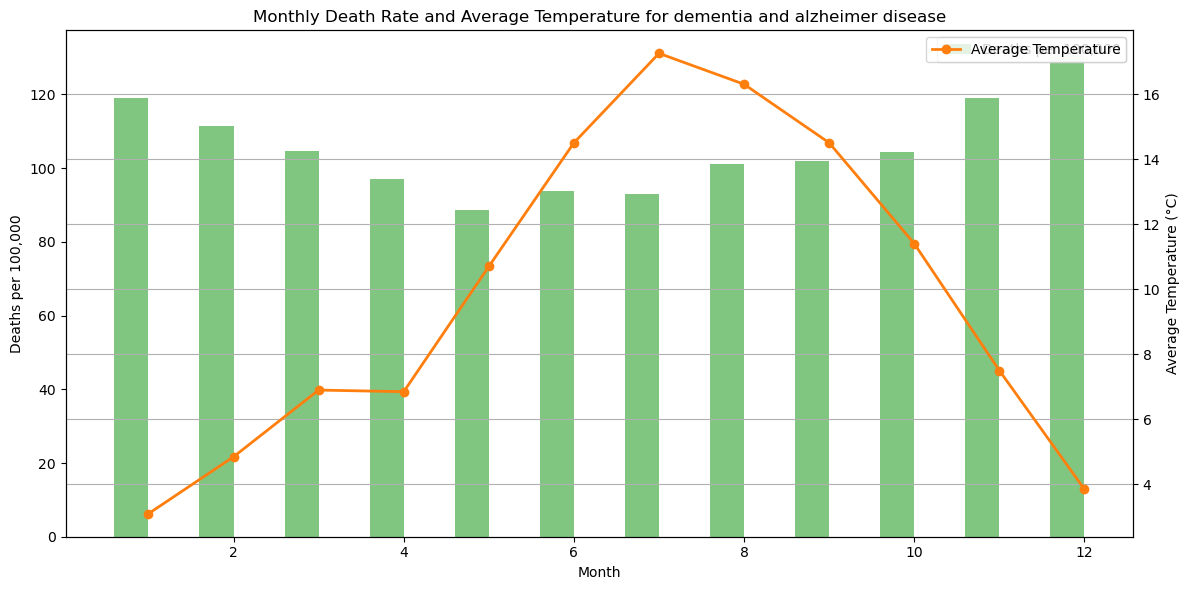

In [ ]:
# 특 질병 필터링
disease = 'dementia and alzheimer disease'
df_disease = df[df['disease'] == disease]

# 월별 평균 사망률과 기온 계산
monthly_data = df_disease.groupby('month').agg({'temperature': 'mean','deaths_per_100000': 'mean'}).reset_index()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Deaths per 100,000
color = 'tab:green'
ax1.set_xlabel('Month')
ax1.set_ylabel('Deaths per 100,000', color='black')
ax1.bar(monthly_data['month'] - 0.2, monthly_data['deaths_per_100000'], width=0.4, color=color, alpha=0.6, label='Deaths per 100,000')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper right')

# Line plot for Temperature on the same x-axis
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Average Temperature (°C)', color='black')
ax2.plot(monthly_data['month'], monthly_data['temperature'], color=color, marker='o', linestyle='-', linewidth=2, label='Average Temperature')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

plt.title(f'Monthly Death Rate and Average Temperature for {disease}')
plt.grid(True)
plt.tight_layout()

plt.show()

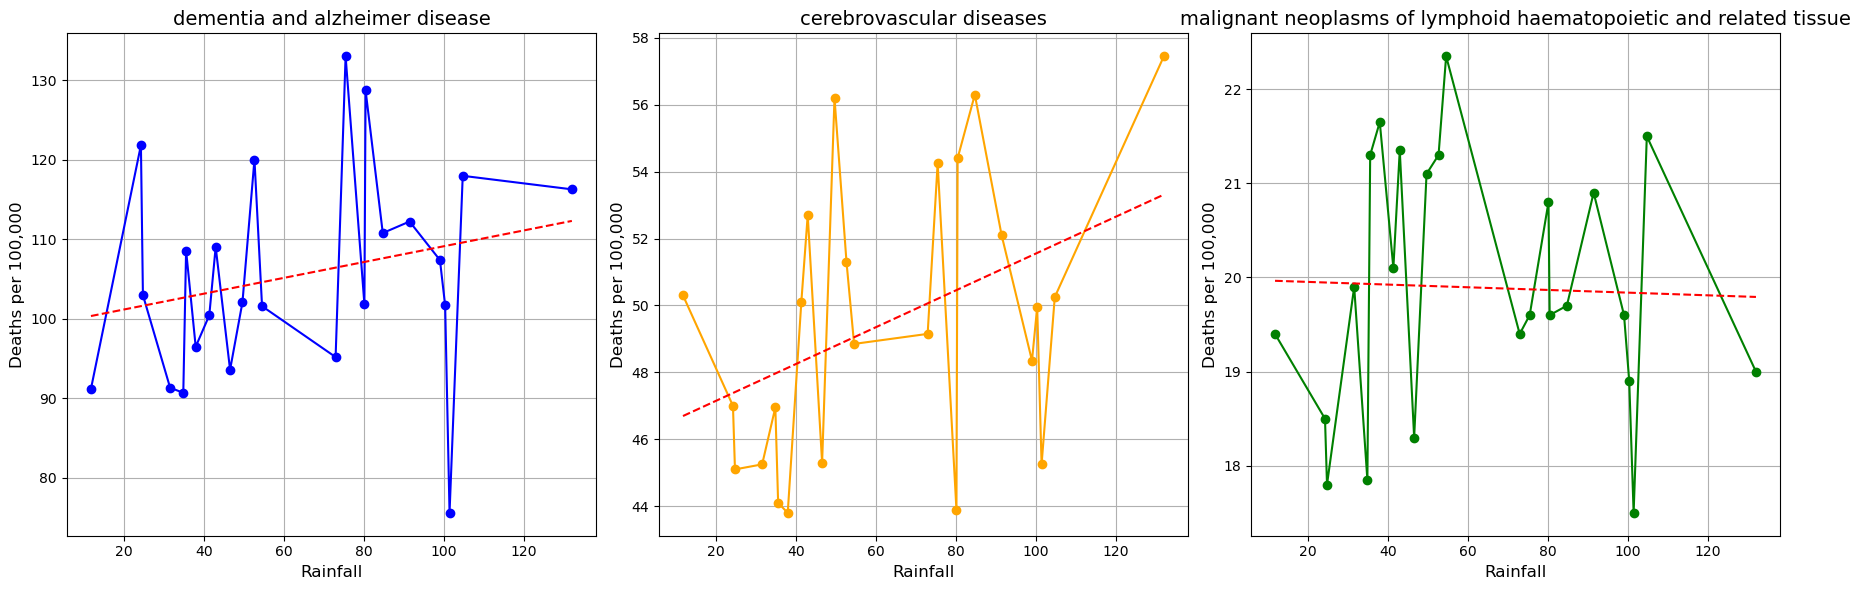

In [12]:
# 질병 리스트
diseases = ['dementia and alzheimer disease', 'cerebrovascular diseases', 'malignant neoplasms of lymphoid haematopoietic and related tissue']

# 색상 리스트
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(18, 6))

# 각 질병에 대해 산점도와 추세선 그리기
for i, disease in enumerate(diseases):
    ax = plt.subplot(1, 3, i + 1)
    df_disease = df[df['disease'] == disease]
    
    # 데이터 그룹화
    disease_gd = df_disease.groupby('rainfall')['deaths_per_100000'].mean().astype(float)
    
    # 추세선 계산
    x = disease_gd.index
    y = disease_gd.values
    coefficients = np.polyfit(x, y, 1)
    trendline = np.polyval(coefficients, x)
    
    # 산점도와 추세선 그리기
    ax.plot(x, y, marker='o', linestyle='-', color=colors[i], label='Deaths per 100,000')
    ax.plot(x, trendline, linestyle='--', color='red', label='Trend Line')
    
    # 그래프 설정
    ax.set_xlabel('Rainfall', fontsize=12)
    ax.set_ylabel('Deaths per 100,000', fontsize=12)
    ax.set_title(disease, fontsize=14)
    #ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()